# Importing Libraries


In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import plotly.express as px

# Importing dataset

In [194]:
data_cleaned=pd.read_csv(r'C:\Users\marci\Achievement 6\01Data\Prepared Data\data_cleaned.csv')


In [202]:
 data_cleaned = data_cleaned.drop(columns=['Unnamed: 0'])

In [204]:
data_cleaned.head()


Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   
3      Incident           2014        January                Central America   
4      Incident           2014        January                Northern Africa   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala               1   
1      North America           Unknown               1   
2      North America           Unknown               1   
3      North America            Mexico               1   
4             Europe             Sudan               1   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Number of Survivors  Number of Females  Number of Males  \
0                    0                  0                1   
1                    0                  0                0   
2                    0                  0                0   
3                    0                  0                1   
4                    2                  0                1   

   Number of Children                                     Cause of Death  \
0                   0                                   Mixed or unknown   
1                   0                                   Mixed or unknown   
2                   0                                   Mixed or unknown   
3                   0                                           Violence   
4                   0  Harsh environmental conditions / lack of adequ...   

             Migration route  \
0  US-Mexico border crossing   
1  US-Mexico border crossing   
2  US-Mexico border crossing   
3  US-Mexico border crossing   
4                    Unknown   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
4                  Border between Russia and Estonia   

                                  Information Source  \
0  Pima County Office of the Medical Examiner (PC...   
1  Pima County Office of the Medical Examiner (PC...   
2  Pima County Office of the Medical Examiner (PC...   
3  Ministry of Foreign Affairs Mexico, Pima Count...   
4                  EUBusiness (Agence France-Presse)   

  UNSD Geographical Grouping   Latitude    Longitude  
0           Northern America  31.650259  -110.366453  
1           Northern America   31.59713   -111.73756  
2           Northern America   31.94026   -113.01125  
3           Northern America  31.506777  -109.315632  
4            Northern Europe    59.1551         28.0

In [42]:
data_cleaned.tail()

Unnamed: 0 Incident Type  Incident year Reported Month  \
12366       13015      Incident           2023           July   
12367       13016      Incident           2023           July   
12368       13017      Incident           2023           July   
12369       13018      Incident           2023           July   
12370       13019      Incident           2023           July   

         Region of Origin Region of Incident     Country of Origin  \
12366        Western Asia       Western Asia  Syrian Arab Republic   
12367  Western Africa (P)       Western Asia               Unknown   
12368      Western Africa    Northern Africa               Senegal   
12369               Mixed    Northern Africa               Unknown   
12370  Western Africa (P)     Western Africa               Unknown   

       Number of Dead  Minimum Estimated Number of Missing  \
12366               4                                    0   
12367               2                                    0   
12368              13                                    0   
12369               6                                    0   
12370              16                                   37   

       Total Number of Dead and Missing  ...  Number of Females  \
12366                                 4  ...                  0   
12367                                 2  ...                  0   
12368                                13  ...                  0   
12369                                 6  ...                  0   
12370                                53  ...                  2   

       Number of Males  Number of Children  \
12366                4                   0   
12367                2                   0   
12368                0                   0   
12369                0                   0   
12370                0                   0   

                                          Cause of Death  \
12366  Vehicle accident / death linked to hazardous t...   
12367  Vehicle accident / death linked to hazardous t...   
12368                                           Drowning   
12369                                           Drowning   
12370                                           Drowning   

                                         Migration route  \
12366                          Türkiye-Europe land route   
12367                          Türkiye-Europe land route   
12368  Western Africa / Atlantic route to the Canary ...   
12369  Western Africa / Atlantic route to the Canary ...   
12370  Western Africa / Atlantic route to the Canary ...   

                                       Location of death  \
12366  In Ipsala, Edirne province, Türkiye - travelli...   
12367  At the Kapıkule Türkiye-Bulgaria Border Gate, ...   
12368  Off the coasts of Dakhla, Western Sahara - 6 s...   
12369  Unspecified location off the coast of Nador, M...   
12370           Off the coast of Ouakam, Dakar, Senegal    

                              Information Source UNSD Geographical Grouping  \
12366    Andalou Agency, Son Dakika, Orient News               Western Asia   
12367                       Son Dakika, Hurriyet               Western Asia   
12368  Barron's News, InfoMigrants, IOM Morrocco              Uncategorized   
12369  El Nashra, Swiss Info; CGTN, IOM Morrocco              Uncategorized   
12370                                IOM Senegal              Uncategorized   

          Latitude   Longitude  
12366  40.91271268   26.369657  
12367  41.71697242   26.351489  
12368  23.72836078  -15.901632  
12369  35.17187365   -2.903182  
12370  14.71870705  -17.506255  

[5 rows x 21 columns]

In [206]:
# Check for missing values

data_cleaned.isnull().sum() # No missing values!

Incident Type                          0
Incident year                          0
Reported Month                         0
Region of Origin                       0
Region of Incident                     0
Country of Origin                      0
Number of Dead                         0
Minimum Estimated Number of Missing    0
Total Number of Dead and Missing       0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
Cause of Death                         0
Migration route                        0
Location of death                      0
Information Source                     0
UNSD Geographical Grouping             0
Latitude                               0
Longitude                              0
dtype: int64

In [50]:
for col in data_cleaned.columns.tolist():
    # Check for inconsistent types within each column
    weird = (data_cleaned[[col]].map(lambda x: type(x)) != data_cleaned[[col]].iloc[0].map(type)).any(axis=1)
    if len(data_cleaned[weird]) > 0:
        print(col)

In [52]:
# # Print rows with inconsistent types in the Latitude and Longitude columns
for col in ['Latitude', 'Longitude']:
    weird = (data_cleaned[[col]].map(lambda x: type(x)) != data_cleaned[[col]].iloc[0].map(type)).any(axis=1)
    if weird.any():
        print(f"Inconsistent types found in column: {col}")
        print(data_cleaned[weird][[col]])  # Display the rows with inconsistent types

In [54]:
## Check for duplicate rows
duplicate_rows = data_cleaned.duplicated()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [56]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Incident Type' column
data_cleaned['Incident Type Encoded'] = label_encoder.fit_transform(data_cleaned['Incident Type'])

# Display the first few rows to verify
data_cleaned.head()

Unnamed: 0 Incident Type  Incident year Reported Month  \
0           0      Incident           2014        January   
1           1      Incident           2014        January   
2           2      Incident           2014        January   
3           3      Incident           2014        January   
4           4      Incident           2014        January   

                Region of Origin Region of Incident Country of Origin  \
0                Central America      North America         Guatemala   
1  Latin America / Caribbean (P)      North America           Unknown   
2  Latin America / Caribbean (P)      North America           Unknown   
3                Central America      North America            Mexico   
4                Northern Africa             Europe             Sudan   

   Number of Dead  Minimum Estimated Number of Missing  \
0               1                                    0   
1               1                                    0   
2               1                                    0   
3               1                                    0   
4               1                                    0   

   Total Number of Dead and Missing  ...  Number of Males  Number of Children  \
0                                 1  ...                1                   0   
1                                 1  ...                0                   0   
2                                 1  ...                0                   0   
3                                 1  ...                1                   0   
4                                 1  ...                1                   0   

                                      Cause of Death  \
0                                   Mixed or unknown   
1                                   Mixed or unknown   
2                                   Mixed or unknown   
3                                           Violence   
4  Harsh environmental conditions / lack of adequ...   

             Migration route  \
0  US-Mexico border crossing   
1  US-Mexico border crossing   
2  US-Mexico border crossing   
3  US-Mexico border crossing   
4                    Unknown   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
4                  Border between Russia and Estonia   

                                  Information Source  \
0  Pima County Office of the Medical Examiner (PC...   
1  Pima County Office of the Medical Examiner (PC...   
2  Pima County Office of the Medical Examiner (PC...   
3  Ministry of Foreign Affairs Mexico, Pima Count...   
4                  EUBusiness (Agence France-Presse)   

  UNSD Geographical Grouping   Latitude    Longitude Incident Type Encoded  
0           Northern America  31.650259  -110.366453                     1  
1           Northern America   31.59713   -111.73756                     1  
2           Northern America   31.94026   -113.01125                     1  
3           Northern America  31.506777  -109.315632                     1  
4            Northern Europe    59.1551         28.0                     1  

[5 rows x 22 columns]

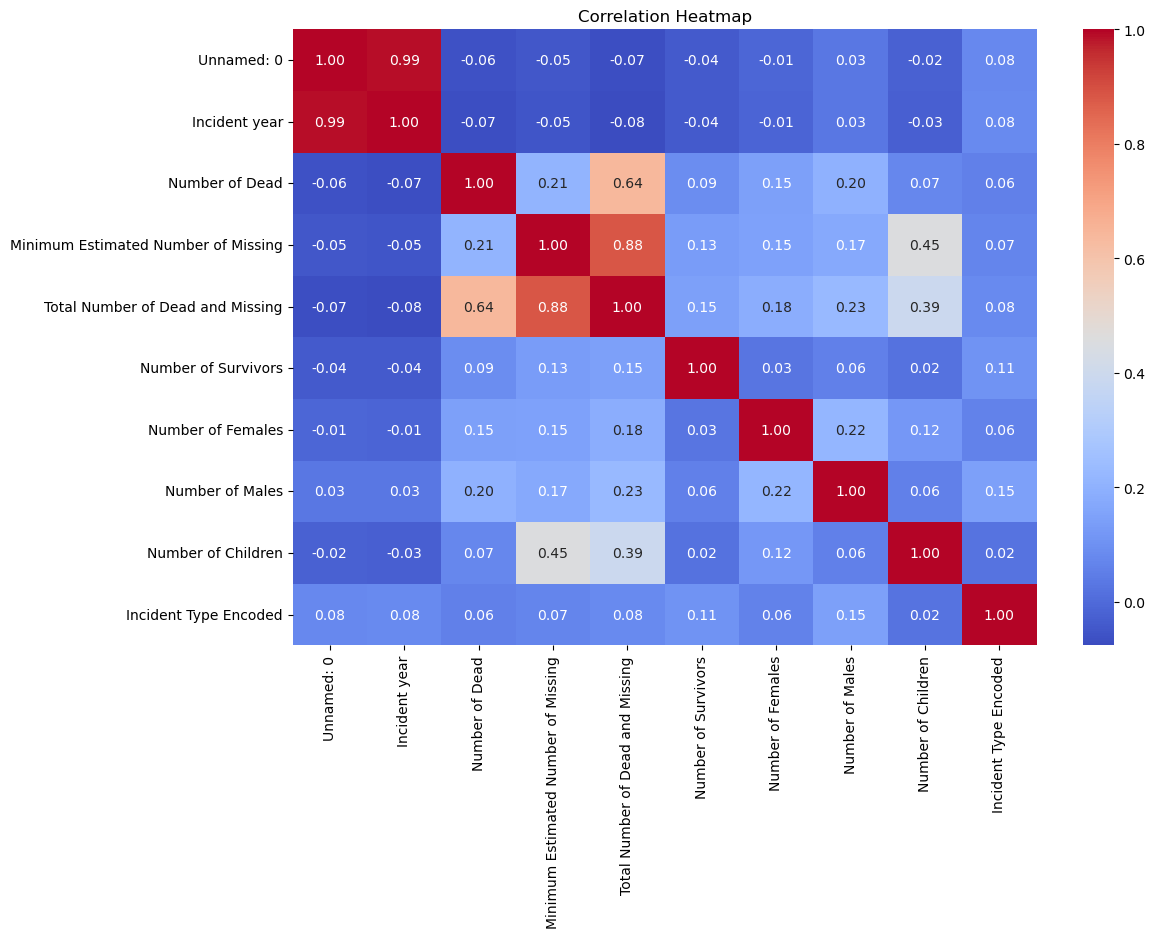

In [113]:

 # Select only numeric columns for the correlation matrix
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#  Correlation Matrix Discussion:: The correlation matrix revealed that the Minimum Estimated Number of Missing has a strong positive correlation (0.88) with the Total Number of Dead and Missing. This suggests that as the estimated number of missing increases, the total casualties also tend to increase, which is expected since more missing people generally correlate with higher overall incident severity.

# Variables like Number of Children and Minimum Estimated Number of Missing (0.45) also show a moderate positive correlation, indicating that incidents involving children tend to have more missing individuals. 

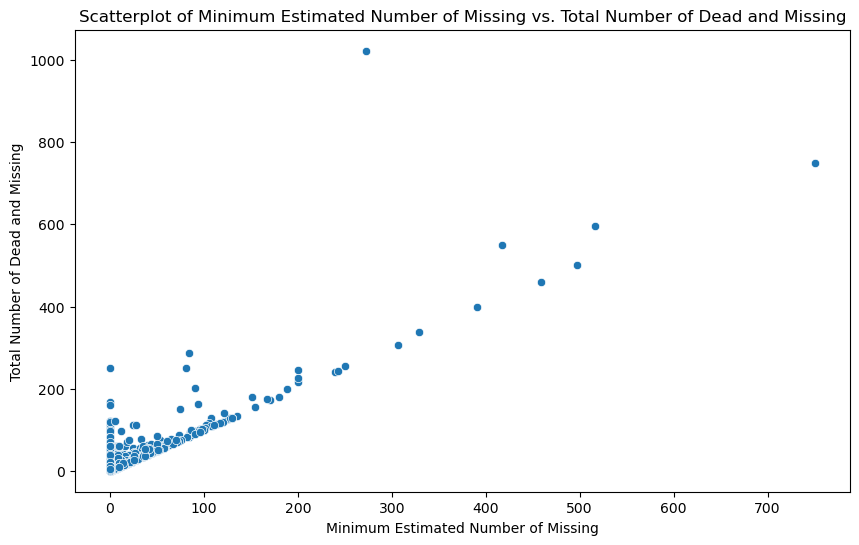

In [115]:
#  Scatterplot for the strongest positive correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Minimum Estimated Number of Missing', y='Total Number of Dead and Missing', data=data_cleaned)
plt.title('Scatterplot of Minimum Estimated Number of Missing vs. Total Number of Dead and Missing')
plt.xlabel('Minimum Estimated Number of Missing')
plt.ylabel('Total Number of Dead and Missing')
plt.show()

# Scatterplot Analysis: The scatterplot of Minimum Estimated Number of Missing vs. Total Number of Dead and Missing shows a linear relationship, supporting the strong correlation identified in the heatmap. The data points are clustered around the line, with some variability, indicating that while there’s a general trend, there are also outliers or incidents with different characteristics.

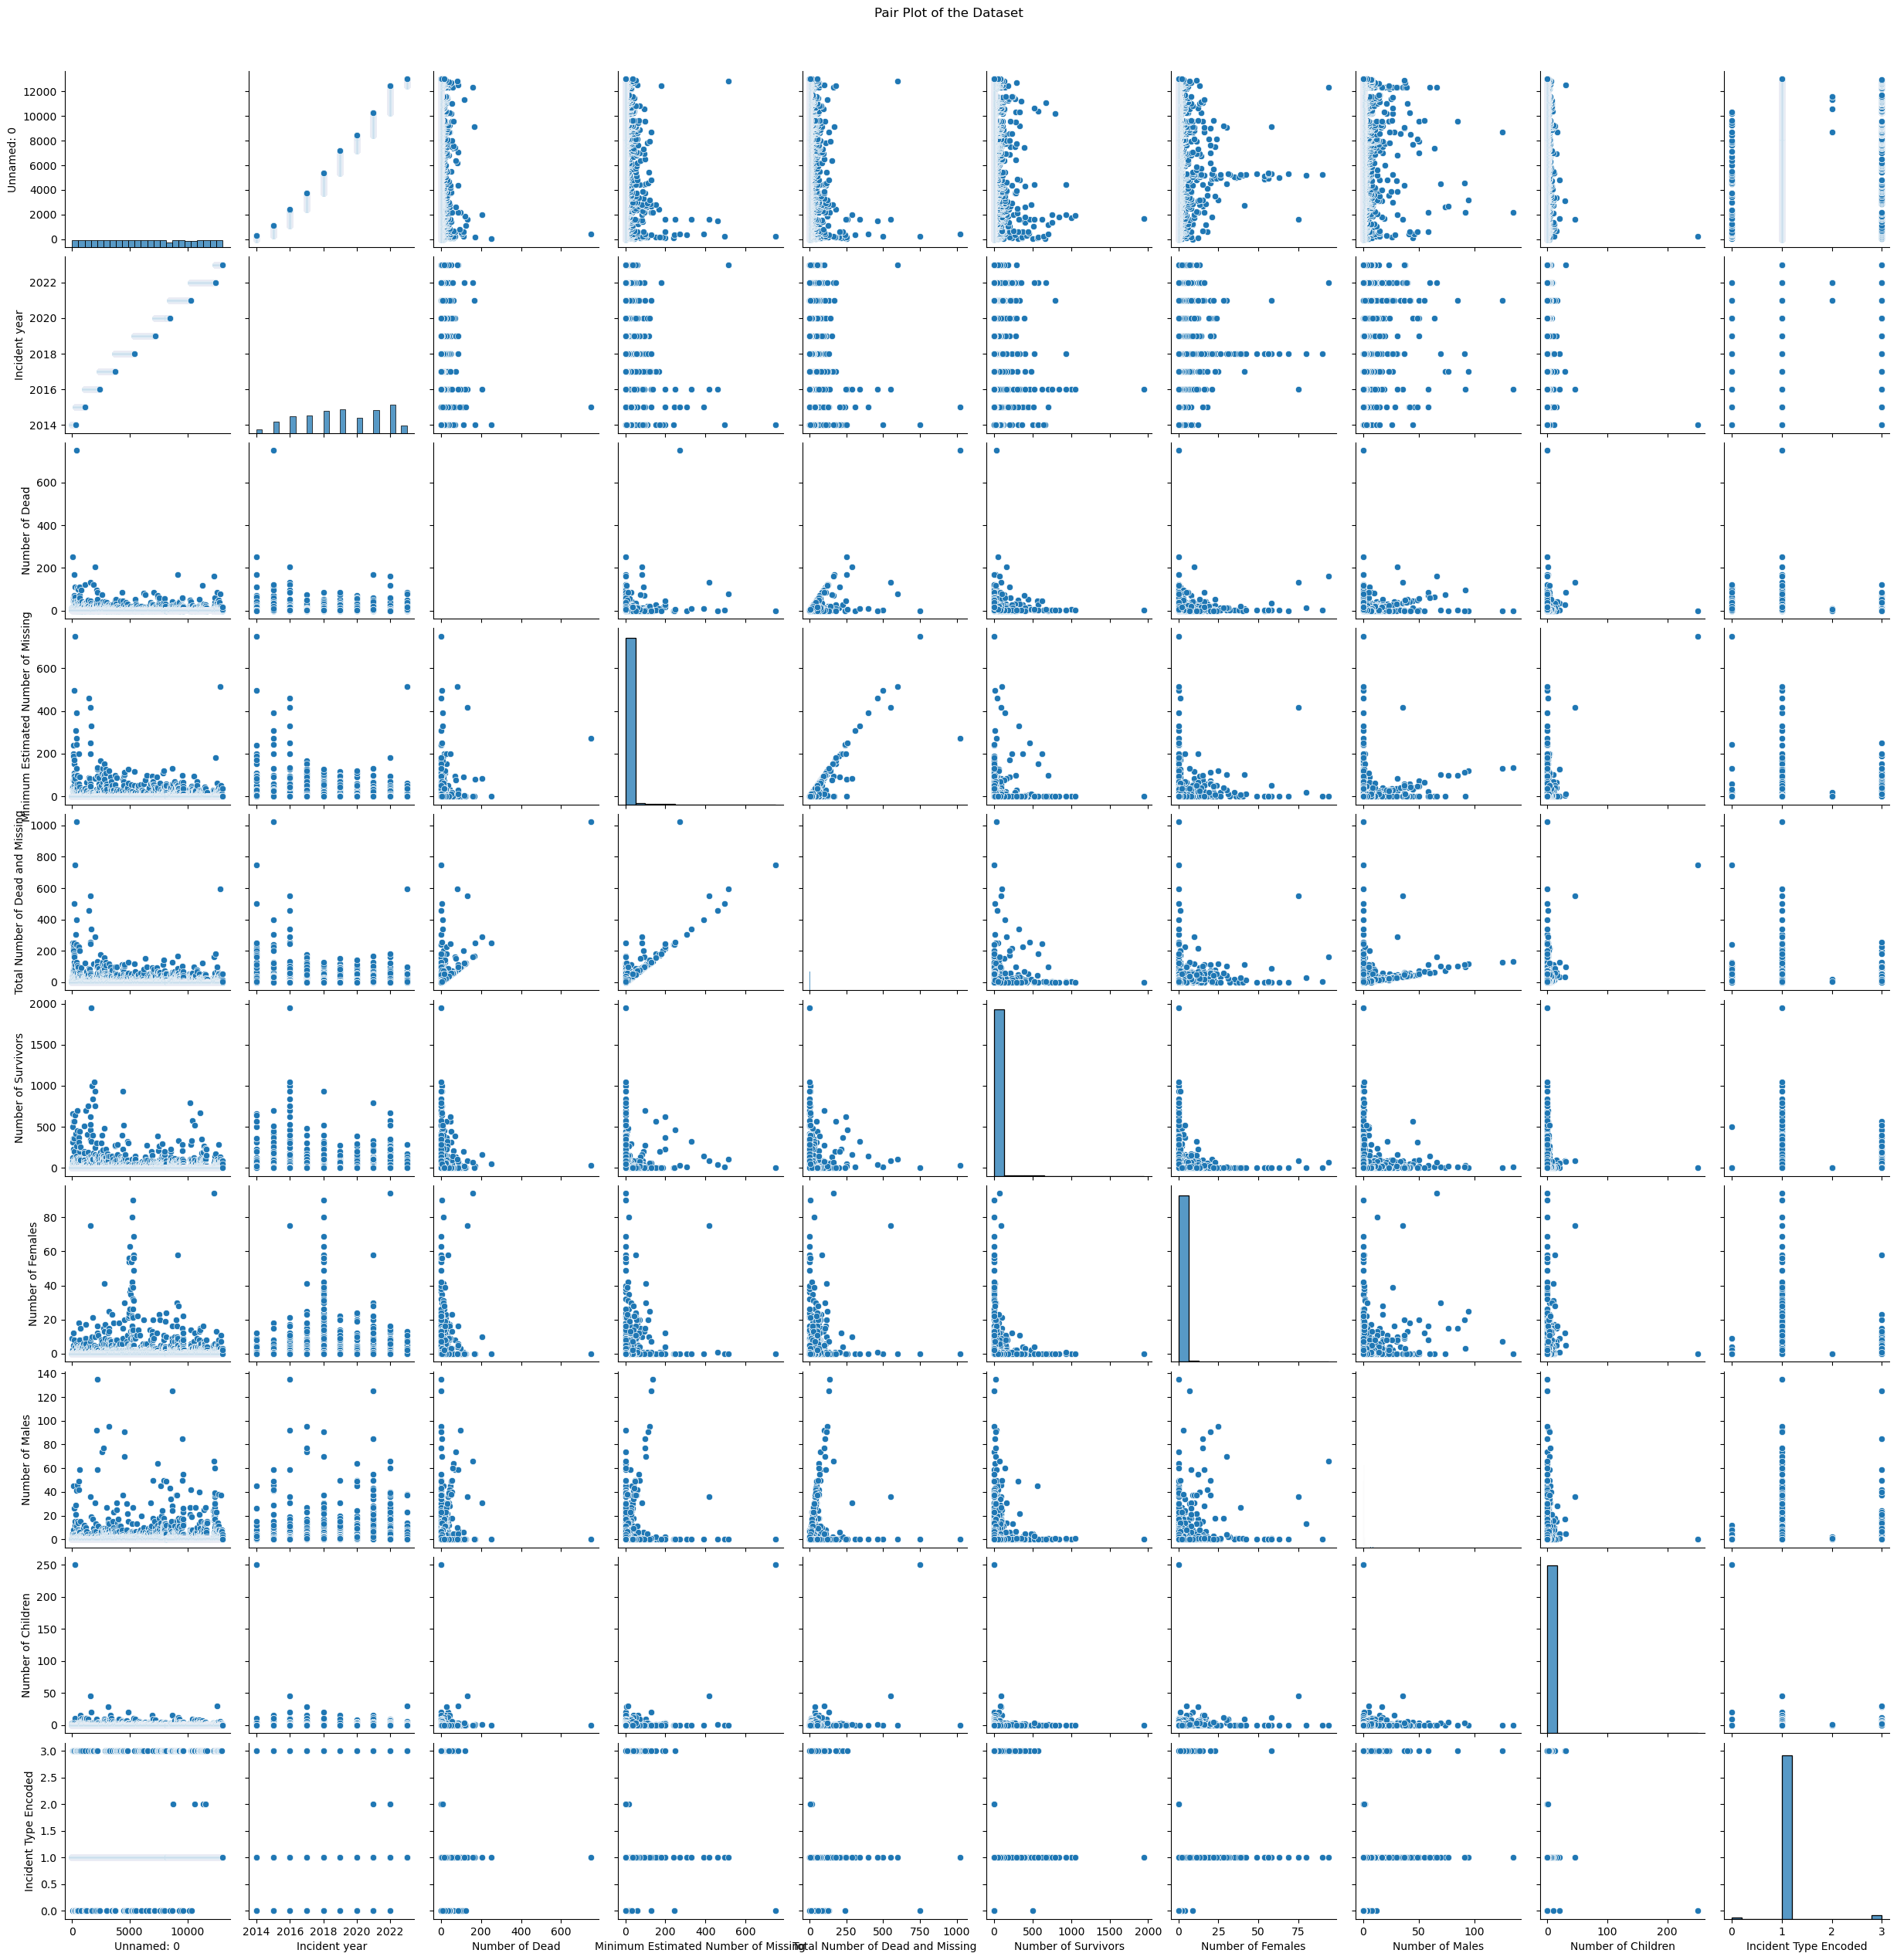

In [117]:
# Pair plot for the dataset
sns.pairplot(data_cleaned)
plt.suptitle('Pair Plot of the Dataset', y=1.02)
plt.show()

# Pair Plot Analysis: The pair plot provides a comprehensive view of the relationships and distributions of all variables. Distributions (histograms) along the diagonal highlight any skewness in the data.
# Variables like Number of Dead and Total Number of Dead and Missing show notable distributions that might require further exploration. Skewness in the histograms indicates that many incidents have low values, but a few have very high values, suggesting the presence of outliers or rare events with significant casualties.

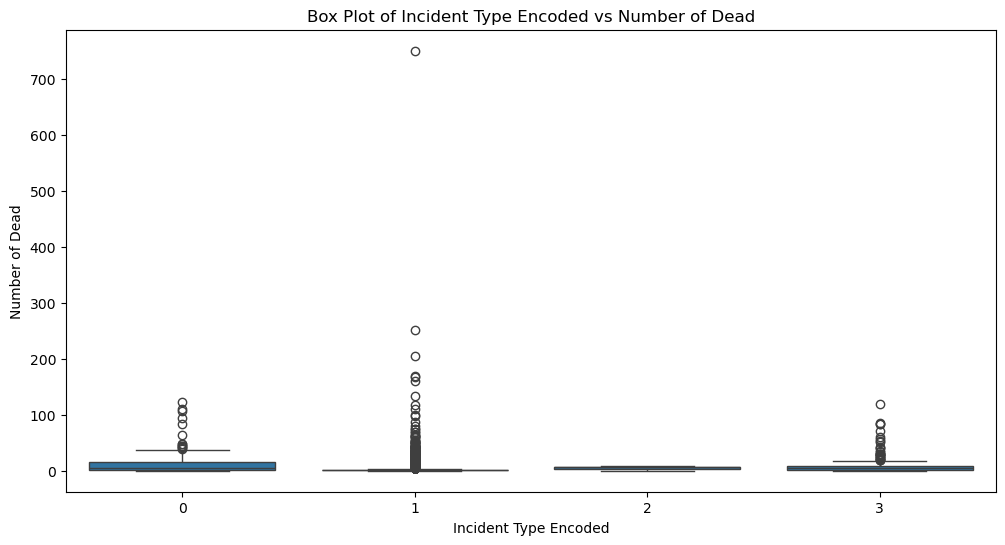

In [124]:
# #Categorical plot - Box plot for Incident Type Encoded vs Number of Dead
plt.figure(figsize=(12, 6))
sns.boxplot(x='Incident Type Encoded', y='Number of Dead', data=data_cleaned)
plt.title('Box Plot of Incident Type Encoded vs Number of Dead')
plt.xlabel('Incident Type Encoded')
plt.ylabel('Number of Dead')
plt.show()

#  Categorical Plot Analysis:
# The box plot for Incident Type Encoded vs. Number of Dead reveals how different types of incidents vary in their fatality rates. We can see the spread and median number of deaths across incident types, indicating which types tend to be more deadly.
# For instance, if certain incident types consistently show higher medians or more outliers, this could be an area for targeted analysis or intervention.

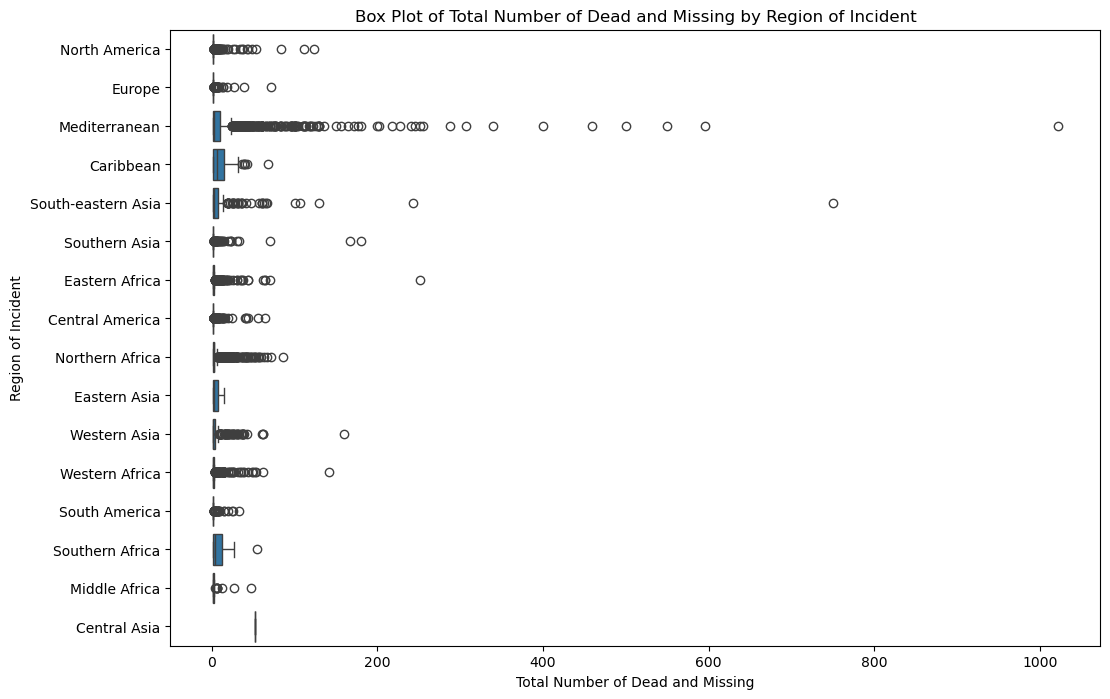

In [169]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Total Number of Dead and Missing', y='Region of Incident', data=data_cleaned)
plt.title('Box Plot of Total Number of Dead and Missing by Region of Incident')
plt.xlabel('Total Number of Dead and Missing')
plt.ylabel('Region of Incident')
plt.show()

# Key Observations:

Wide Variation Across Regions: The box plots for different regions vary significantly in length and position, indicating substantial differences in the distribution of casualties. Some regions, like the Mediterranean and South-eastern Asia, exhibit a wider range of values compared to others.
Outliers: Several regions have outliers, represented by individual data points outside the whiskers. These outliers suggest specific incidents with exceptionally high numbers of casualties in those regions.
Median Values: The median, represented by the horizontal line within each box, varies across regions. This indicates differences in the typical number of casualties for each region.
Skewness: Some regions exhibit skewness in the data distribution, as indicated by the position of the median within the box. For example, the Mediterranean region appears to have a right-skewed distribution, suggesting a larger number of incidents with fewer casualties and a smaller number of incidents with significantly higher casualties.
# High Casualty Regions: Regions like the Mediterranean and South-eastern Asia tend to have higher overall numbers of casualties, as evidenced by the position of their box plots and the presence of outliers.


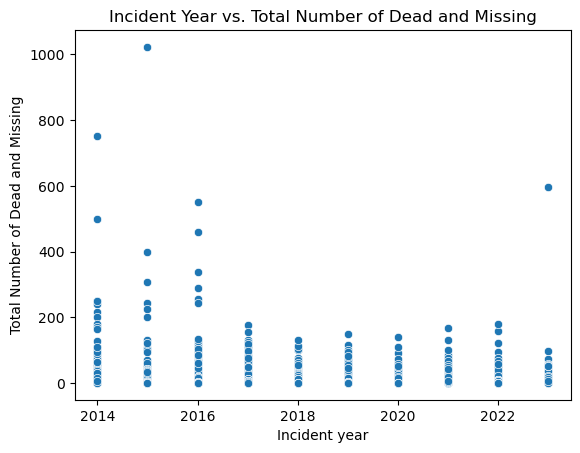

In [172]:
sns.scatterplot(data=data_cleaned, x='Incident year', y='Total Number of Dead and Missing')
plt.title('Incident Year vs. Total Number of Dead and Missing')
plt.show()

# No Clear Correlation: There seems to be no consistent relationship between the incident year and the total number of dead and missing. The data points are scattered without a discernible pattern.

Text(0.5, 1.0, 'Distribution of Total Number of Dead and Missing')

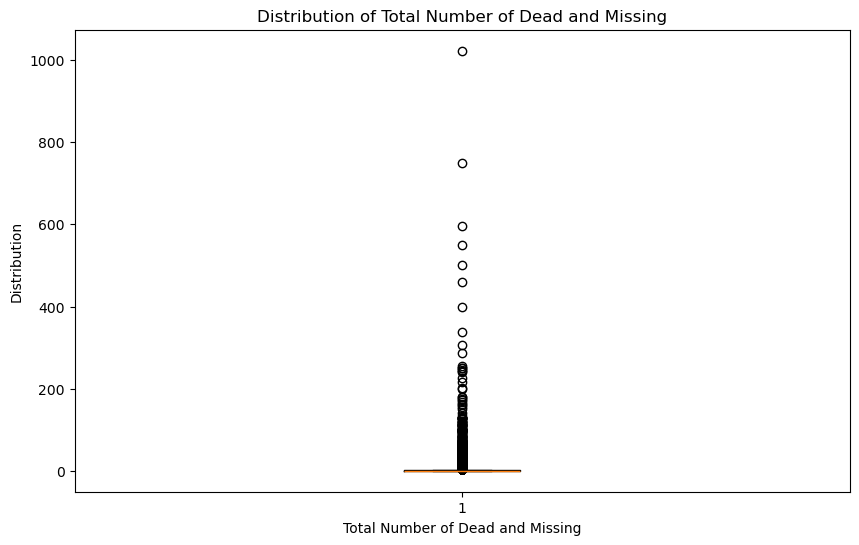

In [186]:
# # Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_cleaned['Total Number of Dead and Missing'])
plt.xlabel('Total Number of Dead and Missing')
plt.ylabel('Distribution')
plt.title('Distribution of Total Number of Dead and Missing')


# Overall, the box plot reveals that the data is highly skewed, with a concentration of incidents resulting in a lower number of casualties and a few outlier events with significantly higher numbers of casualties.

# Additional Insights:

The presence of outliers suggests that further investigation might be needed to understand the specific circumstances surrounding these incidents.
The skewness of the distribution indicates that the mean value might not be the most representative measure of central tendency in this case. The median might be a more appropriate measure.

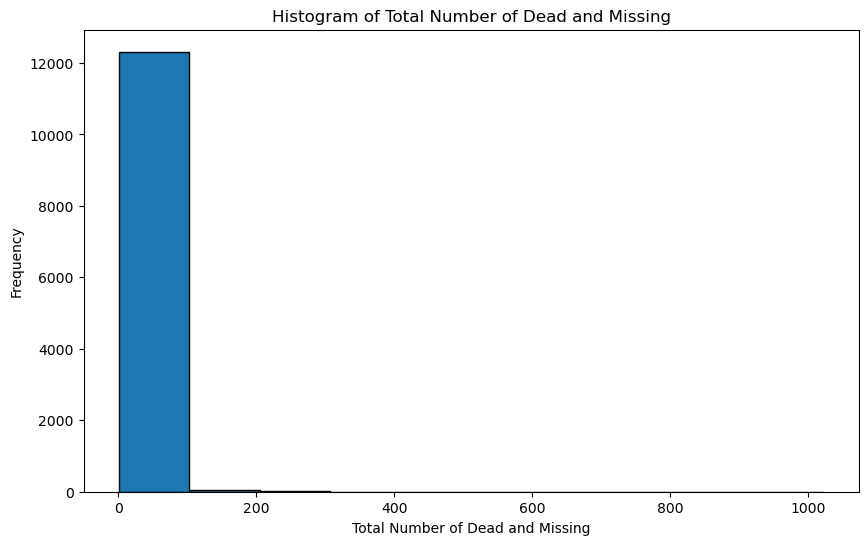

In [180]:
# # Histogram
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Total Number of Dead and Missing'], bins=10, edgecolor='black')
plt.xlabel('Total Number of Dead and Missing')
plt.ylabel('Frequency')
plt.title('Histogram of Total Number of Dead and Missing')
plt.show()

# Overall, the histogram reveals that the data is heavily concentrated on incidents with a low number of casualties, with a few outlier events contributing to the rightward skew.

# Additional Insights:

The skewness of the distribution is consistent with the box plot's findings, further emphasizing the presence of outliers.
The histogram provides a visual representation of the frequency distribution, complementing the box plot's information on data distribution.

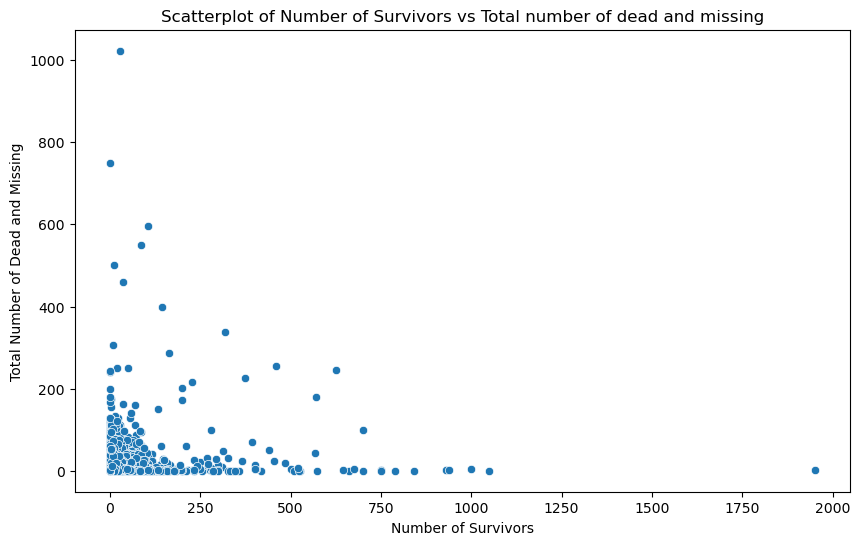

In [182]:
# Scatterplot for two variables with strong correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Number of Survivors'], y=data_cleaned['Total Number of Dead and Missing'])
plt.title('Scatterplot of Number of Survivors vs Total number of dead and missing')
plt.show()

# The scatter plot shows a weak positive correlation between the number of survivors and the total number of dead and missing in migration incidents. This means that, generally, incidents with a higher number of survivors also tend to have a higher total number of dead and missing.

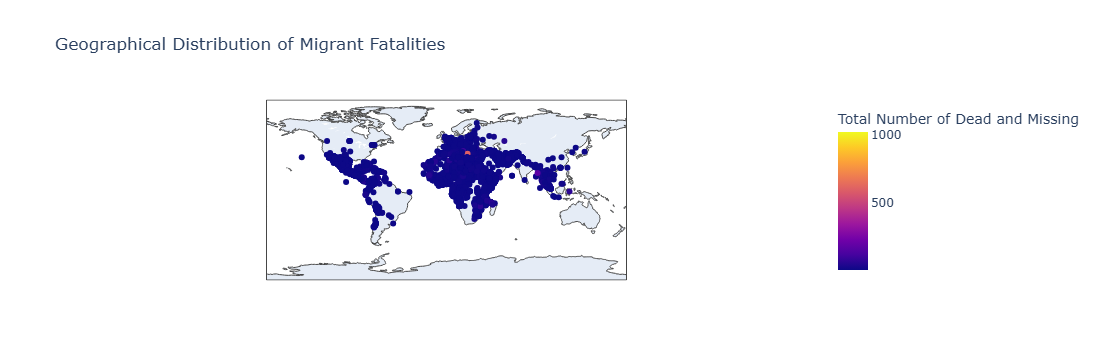

In [137]:
fig = px.scatter_geo(data_cleaned, lat='Latitude', lon='Longitude',
                     color='Total Number of Dead and Missing',
                     hover_name='Location of death',
                     title='Geographical Distribution of Migrant Fatalities')
fig.show()

# Overall, the scatter geo plot provides a valuable overview of the geographical distribution of migrant fatalities, highlighting areas of concern and informing potential interventions.

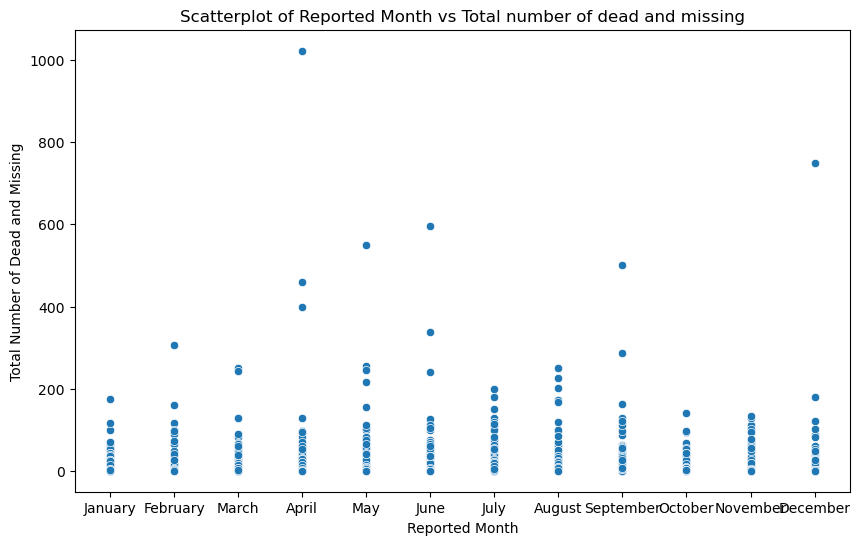

In [86]:
# Scatterplot for two variables with strong correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Reported Month'], y=data_cleaned['Total Number of Dead and Missing'])
plt.title('Scatterplot of Reported Month vs Total number of dead and missing')
plt.show()

# Key Observations:

Data Distribution: The data points are distributed across all months, indicating that incidents with fatalities or disappearances occur throughout the year.
No Clear Correlation: There appears to be no consistent relationship between the reported month and the total number of dead and missing. The data points are scattered without a discernible pattern.
Outliers: A few data points with exceptionally high numbers of casualties can be observed in certain months. These outliers might represent specific incidents with a significant impact.

Future analysis: Group the distribution of data points for each individual year to identify potential seasonal patterns or trends.

# . Hypothesis Testing: Regional Analysis
•	Proportion of Missing Migrants by Region:
o	Null Hypothesis (H0): The proportion of missing migrants is the same across different regions.
o	Alternative Hypothesis (H1): Certain regions have a significantly higher proportion of missing migrants compared to others.


In [208]:
data_cleaned.to_csv(r"C:\Users\marci\Achievement 6\01Data\Prepared Data\data_cleaned.csv")